<a href="https://colab.research.google.com/github/xili5979/CS61-1/blob/main/ImageCutting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image cutting and information extracting

## load images

## import

In [96]:
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

## Image cutting

In [97]:
def Get_Outline(input_dir,min,max):
    image = cv2.imread(input_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    dilate = cv2.dilate(blurred, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
    edged = cv2.Canny(dilate, min, max, 3)
    
    return image, gray, edged
 
 
def Get_cnt(edged):
    #Find contours
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #cv version
    cnts = cnts[1] if imutils.is_cv3() else cnts[0]
    
    return cnts

def Get_cnt_closed(edged):
    #Find contours
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #cv version
    cnts = cnts[1] if imutils.is_cv3() else cnts[0]
    # only get closed cnts
    # area is not zero
    cnts_closed = []
    for cnt in cnts:
        if cv2.contourArea(cnt) != 0:
            cnts_closed.append(cnt)
    
    return cnts_closed

def Draw_cnt(source,cnts):
    cv2.drawContours(source,cnts,-1,(0,255,0),3)
    return source



In [98]:
image, gray, edged = Get_Outline("/content/drive/MyDrive/5703File/DataSet/imageCutting/fx1.jpeg",50,100)
cnts = Get_cnt_closed(edged)
image_draw = Draw_cnt(image,cnts)

In [99]:
image_ori = cv2.imread("/content/drive/MyDrive/5703File/DataSet/imageCutting/fx1.jpeg")
image_ori = cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB)

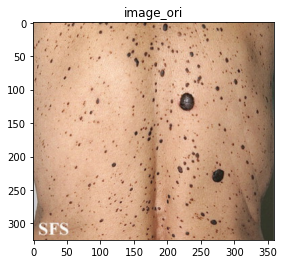

In [100]:
plt.imshow(image_ori),plt.title('image_ori')
plt.show()

In [101]:
len(cnts)

228

In [102]:
len(cnts[1])

15

## show all images

In [118]:
def show_imgs(input_imgs):
    imgs_num = len(input_imgs)
    row = math.ceil(imgs_num/5)
    f, ax = plt.subplots(row, 5, figsize=(50,50))

    for i, img in enumerate(input_imgs):
        ax[i//5, i%5].imshow(img)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title('test ' + str(i+1))
    plt.show()

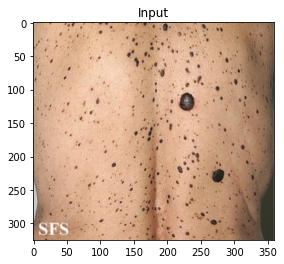

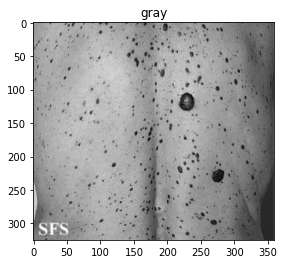

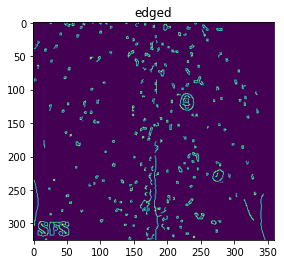

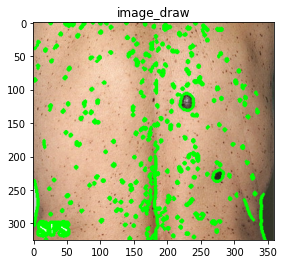

In [112]:
plt.imshow(image_ori),plt.title('Input')
plt.show()
plt.imshow(gray,cmap='gray'),plt.title('gray')
plt.show()
plt.imshow(edged),plt.title('edged')
plt.show()
plt.imshow(image_draw),plt.title('image_draw')
plt.show()

## cut the image

In [113]:
#every y
# cnts[1][i][0][1]
#every x
# cnts[1][i][0][0]

In [114]:
# # my own
# cutted_set = []
# # for everyone
# for i in range(len(cnts)):
#     max_x = 0
#     max_y = 0
#     min_x = 10000
#     min_y = 10000
#     for j in range(len(cnts[i])):
#         if cnts[i][j][0][0] > max_x:
#             max_x = cnts[i][j][0][0]
#         if cnts[i][j][0][0] < min_x:
#             min_x = cnts[i][j][0][0]

#         if cnts[i][j][0][1] > max_y:
#             max_y = cnts[i][j][0][1]
#         if cnts[i][j][0][1] < min_y:
#             min_y = cnts[i][j][0][1]
#     print(min_y,max_y,min_x,max_x)
#     # make the cutting part bigger
#     upper_index = 10
#     if min_y < upper_index:
#         min_y = 0
#     else:
#         min_y = min_y - upper_index
#     if min_x < upper_index:
#         min_x = 0
#     else:
#         min_x = min_x - upper_index
#     max_x = max_x + upper_index
#     max_y = max_y + upper_index

#     cutted = image_ori[min_y:max_y,min_x:max_x]
#     cutted_set.append(cutted)

In [115]:
# bounding rect
cutted_set_cv = []
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    min_y,max_y,min_x,max_x = y,y+h,x,x+w
    # make the cutting part bigger
    upper_index = 10
    if min_y < upper_index:
        min_y = 0
    else:
        min_y = min_y - upper_index
    if min_x < upper_index:
        min_x = 0
    else:
        min_x = min_x - upper_index
    max_x = max_x + upper_index
    max_y = max_y + upper_index

    cutted_cv = image_ori[min_y:max_y,min_x:max_x]
    cutted_set_cv.append(cutted_cv)


In [116]:
# #show cutted
# show_imgs(cutted_set)

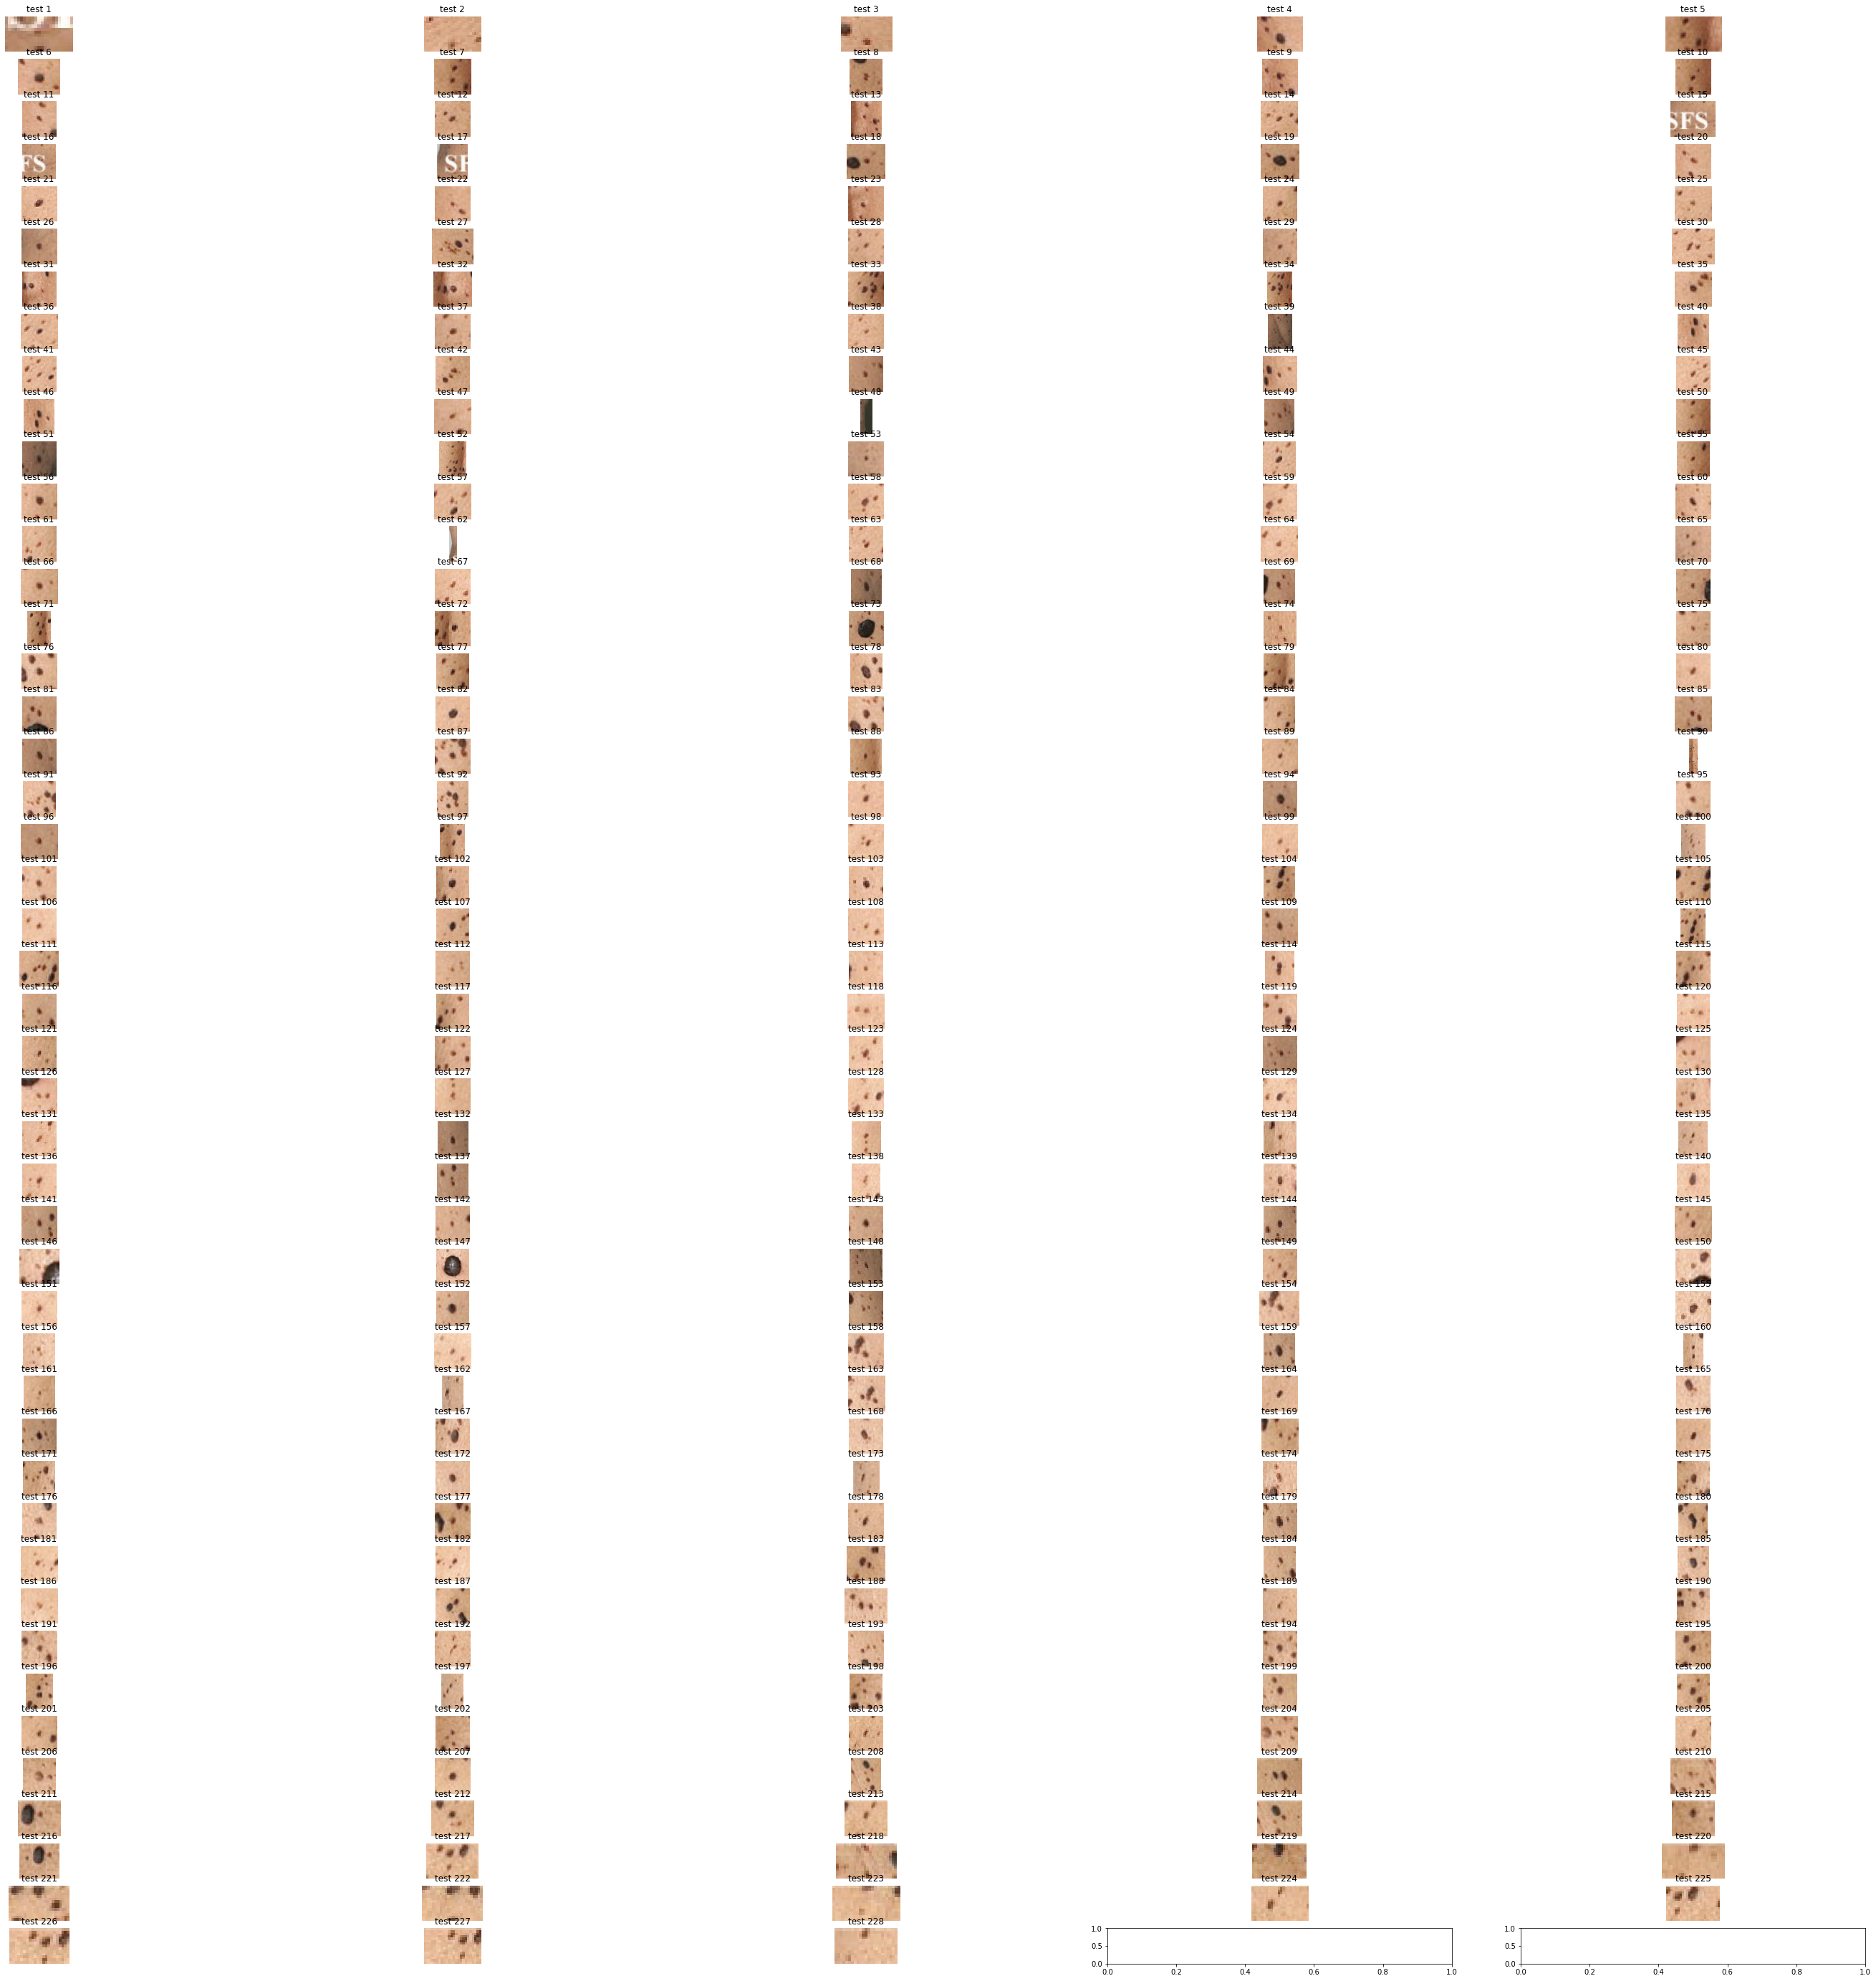

In [119]:
#show cutted
show_imgs(cutted_set_cv)